# 8. Adding more layers, using larger layers, or crafting more features? (Solution)

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.1 (16/06/2023)

**Requirements:**
- Python 3 (tested on v3.11.4)
- Matplotlib (tested on v3.7.1)
- Numpy (tested on v1.24.3)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
# Numpy
import numpy as np
# Sklearn
from sklearn.metrics import accuracy_score
# Removing unecessary warnings (optional, just makes notebook outputs more readable)
import warnings
warnings.filterwarnings("ignore")

We have also prepared a few functions to help you, in the utils.py file, which is given along with this notebook. Feel free to have a look at it.

In [2]:
from utils import *

### 1. New mock dataset generation - Nonlinearity with a mysterious equation

As before, we will generate a dataset with some non-linearity, whose boundary follows a mysterious equation.

We do not, however, provide the exact equation of the boundary. 

In [3]:
# Dataset Generation values
eps = 1e-5
min_val = -1 + eps
max_val = 1 - eps
n_points = 1000

In [4]:
# Generate dataset
np.random.seed(27)
val1_list, val2_list, inputs, outputs = create_dataset(n_points, min_val, max_val)
# Check a few entries of the dataset
print(val1_list.shape)
print(val2_list.shape)
print(inputs.shape)
print(outputs.shape)
print(inputs[0:5, :])
print(outputs[0:5])

(1000,)
(1000,)
(1000, 2)
(1000, 1)
[[-0.15  0.96]
 [ 0.63 -0.91]
 [ 0.47  0.53]
 [ 0.74  0.04]
 [-0.23 -0.83]]
[[1]
 [1]
 [1]
 [1]
 [1]]


As expected and observed in the plots below, the dataset does not exhibit linearity, due to the presence of a mysterious function.

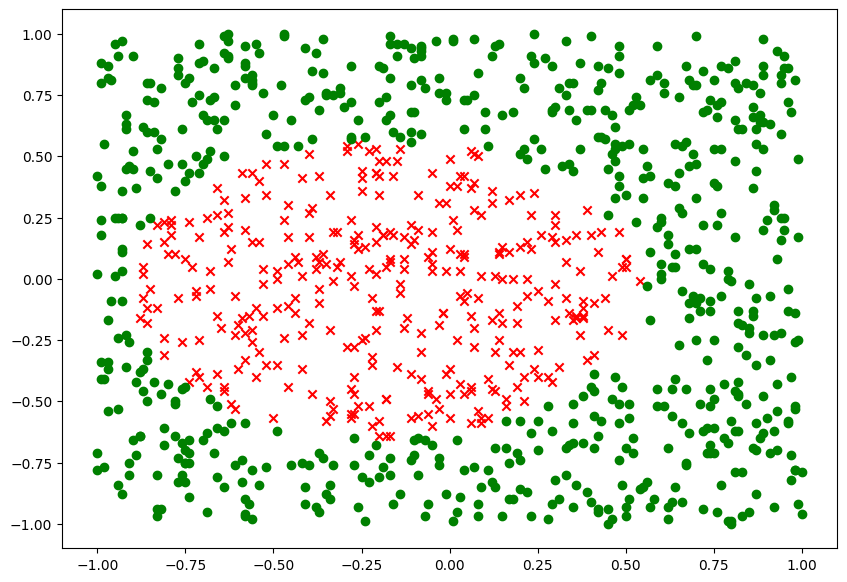

In [5]:
# Show the dataset (no classification)
show_dataset(val1_list, val2_list, outputs)

### 2. Template for our Shallow Neural Network with Activation functions from Notebook 4

As in Notebook 4, below is the template class for a neural network consisting of a single linear layer, with sigmoid activation function. The class has been coded for you in the utils file and it ready to be used, as shown below.

Let us try to train it and see its capabilities on the classification task.

In [6]:
# Define and train neural network structure
n_x = 2
n_y = 1
np.random.seed(37)
shallow_neural_net_act = ShallowNeuralNet_WithAct_OneLayer(n_x, n_y)
# Train and show final loss
shallow_neural_net_act.train(inputs, outputs, N_max = 10000, alpha = 1, delta = 1e-8, display = True)
print(shallow_neural_net_act.loss)

Iteration 1 - Loss = 0.6628996857776656
Stopping early - loss evolution was less than delta on iteration 467.
0.6239145092293222


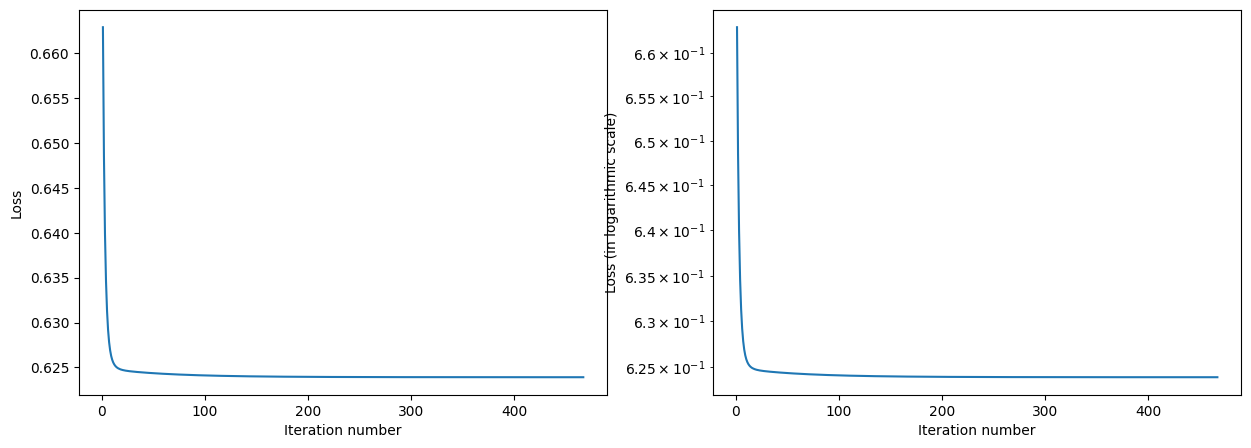

In [7]:
# Training curves
shallow_neural_net_act.show_losses_over_training()

The model trained, but we are not surprised to see that it struggles to classify... The model is too simple for the task.

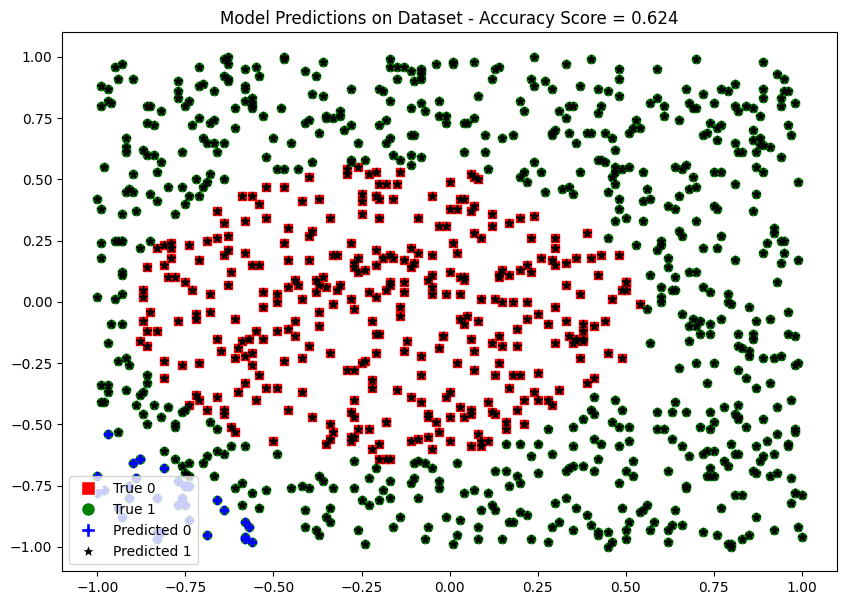

In [8]:
# Show dataset and predictions made by model
show_dataset_and_predictions(inputs, val1_list, val2_list, outputs, shallow_neural_net_act)

### 3. How about two layers then?

How about two layers then? (As in Notebook 4 also).

In [9]:
# Define and train neural network structure (with activation)
n_x = 2
n_h = 2
n_y = 1
np.random.seed(37)
shallow_neural_net_act2 = ShallowNeuralNet_WithAct_TwoLayers(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_act2.train(inputs, outputs, N_max = 10000, alpha = 1, delta = 1e-8, display = True)
print(shallow_neural_net_act2.loss)

Iteration 1 - Loss = 0.6572939415037442
Iteration 501 - Loss = 0.5653094728989203
Iteration 1001 - Loss = 0.5338803386151092
Iteration 1501 - Loss = 0.5000578107101548
Iteration 2001 - Loss = 0.4741826492767281
Iteration 2501 - Loss = 0.40922207633183927
Iteration 3001 - Loss = 0.38354250939286955
Iteration 3501 - Loss = 0.3745724947773156
Iteration 4001 - Loss = 0.3705137264302391
Iteration 4501 - Loss = 0.36795020904484615
Iteration 5001 - Loss = 0.36515596436940345
Iteration 5501 - Loss = 0.36034231325482635
Iteration 6001 - Loss = 0.35584745560901887
Iteration 6501 - Loss = 0.3545210739894168
Iteration 7001 - Loss = 0.35422093686039446
Iteration 7501 - Loss = 0.35402756896685184
Iteration 8001 - Loss = 0.3538451069208992
Iteration 8501 - Loss = 0.35366770925378876
Iteration 9001 - Loss = 0.353493964657627
Iteration 9501 - Loss = 0.35332299483420865
Stopping - Maximal number of iterations reached.
0.3531545860761092


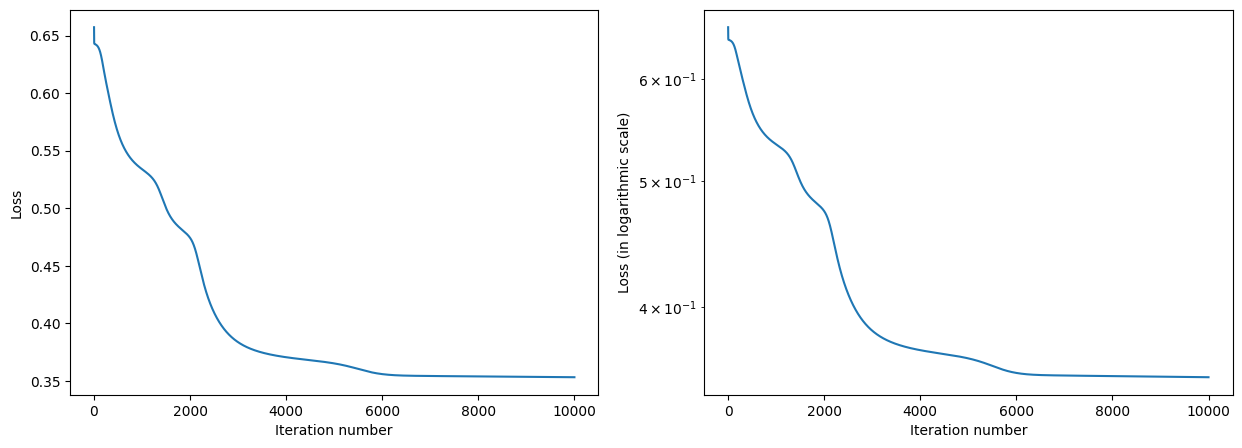

In [10]:
# Training curves
shallow_neural_net_act2.show_losses_over_training()

The model trained, but it stil struggles to classify... Is the model still too simple for the task?

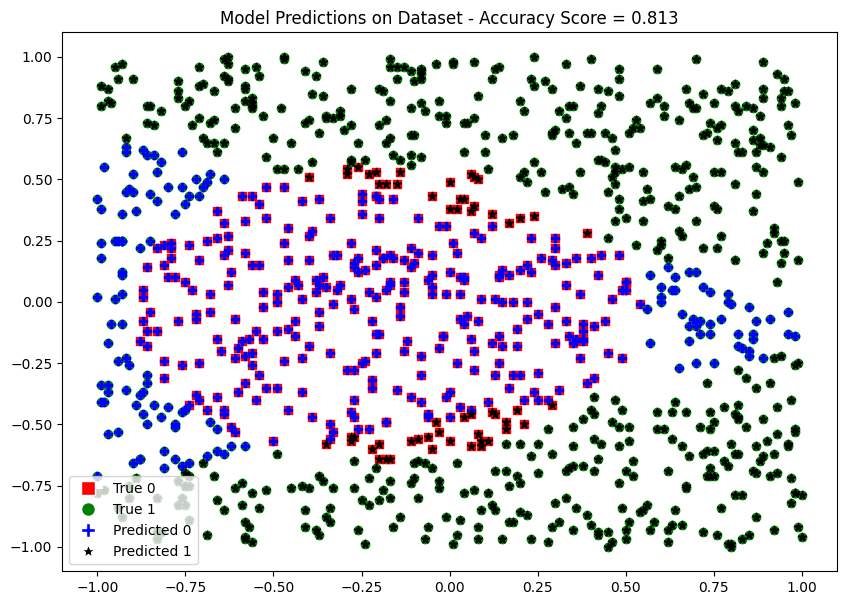

In [11]:
# Show dataset and predictions made by model
show_dataset_and_predictions(inputs, val1_list, val2_list, outputs, shallow_neural_net_act2)

### 4. How about two layers, but more neurons?

A thing that might help would be adding more neurons to the first layer, because using only two neurons might not be enough.

**Practice #1:** Let us go back to our original two layers model, but this time, let us increase the size of the first layer, for instance, let us try using $ n_h = 10 $ instead of $ 2 $. Is that going to help?

In [12]:
# Define and train neural network structure (with activation)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_act3 = ShallowNeuralNet_WithAct_TwoLayers(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_act3.train(inputs, outputs, N_max = 10000, alpha = 1, delta = 1e-8, display = True)
print(shallow_neural_net_act3.loss)

Iteration 1 - Loss = 0.6431367468078115
Iteration 501 - Loss = 0.5848313092226337
Iteration 1001 - Loss = 0.3117417508730858
Iteration 1501 - Loss = 0.1517886238481467
Iteration 2001 - Loss = 0.12117884642354385
Iteration 2501 - Loss = 0.10454045537253825
Iteration 3001 - Loss = 0.09138686390507013
Iteration 3501 - Loss = 0.079960971118566
Iteration 4001 - Loss = 0.07143330480208235
Iteration 4501 - Loss = 0.06550630163035127
Iteration 5001 - Loss = 0.06104427629494215
Iteration 5501 - Loss = 0.05745686959318786
Iteration 6001 - Loss = 0.05446155653654117
Iteration 6501 - Loss = 0.05190047951751221
Iteration 7001 - Loss = 0.04967370805731739
Iteration 7501 - Loss = 0.04770920702967478
Iteration 8001 - Loss = 0.04594970243130595
Iteration 8501 - Loss = 0.04434753519179965
Iteration 9001 - Loss = 0.04286210668340715
Iteration 9501 - Loss = 0.04145844201553639
Stopping - Maximal number of iterations reached.
0.04011076661166643


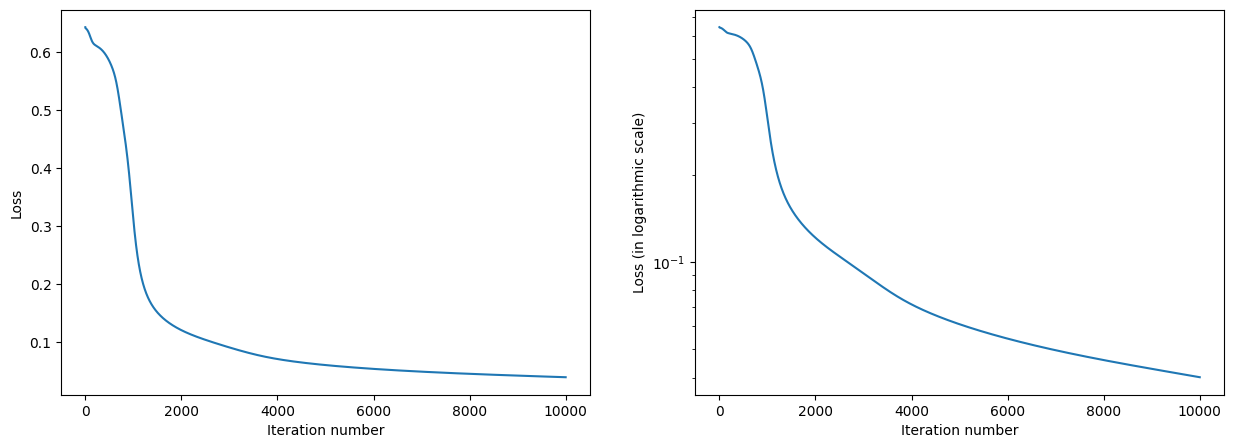

In [13]:
shallow_neural_net_act3.show_losses_over_training()

It trains and almost classifies perfectly!

That is another important lesson: you should always ensure that your layers have enough neurons in them.

What is a good number of neurons to use then? That is not an easy question to answer, we will discuss it in class together at the end of the lecture.

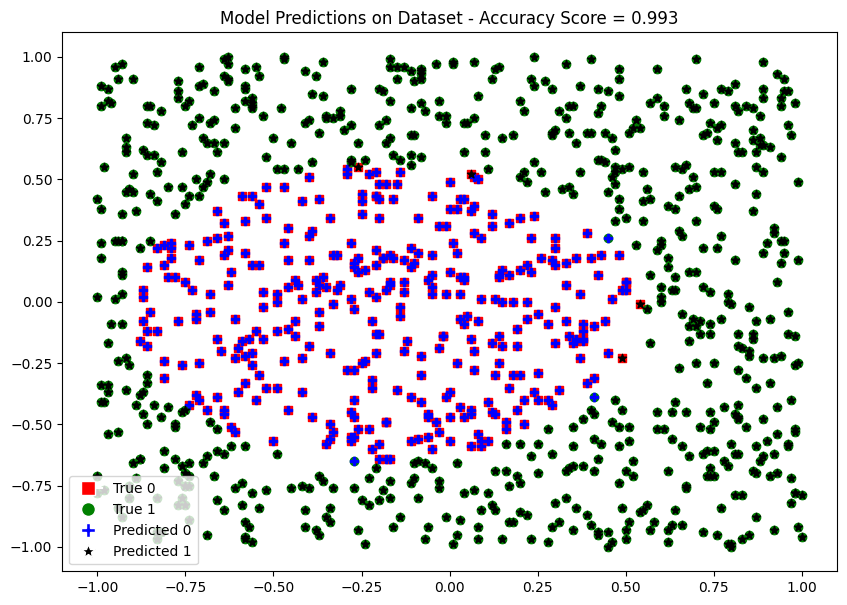

In [14]:
show_dataset_and_predictions(inputs, val1_list, val2_list, outputs, shallow_neural_net_act3)

### 5. How about some feature engineering instead?

**Practice #2:** The mysterious equation, in the utils file, seems to be using the squared values of the inputs. How about reworking the inputs so each sample consists of 4 values instead of 2, by adding the squared values of each original inputs?

In other words, what we are suggesting here is to process the inputs and generate polynomial features, as in the polynomial regression, so that each input sample $ i $ in the dataset is transformed as:

$$ (val_1, val_2) \rightarrow (val_1, val_2, val_1^2, val_2^2) $$

Do note that after this input transformation we will call our two-layers model, but will have to replace $ N_x = 2 $ with $ N_x = 4 $.

And let us go back to only using two layers instead of three as using more layers did not solve the problem.

In [15]:
# Processing feature so they have squared values instead
def rework_inputs(inputs):
    squared = inputs**2
    inputs_processing = np.hstack((inputs, squared))
    return inputs_processing

In [16]:
# Processing feature so they have squared values instead
inputs_processing = rework_inputs(inputs)
print(inputs_processing)

[[-0.15    0.96    0.0225  0.9216]
 [ 0.63   -0.91    0.3969  0.8281]
 [ 0.47    0.53    0.2209  0.2809]
 ...
 [ 0.76    0.71    0.5776  0.5041]
 [-0.7    -0.66    0.49    0.4356]
 [-0.22   -0.08    0.0484  0.0064]]


In [17]:
# Define and train neural network structure (with activation)
n_x = 4
n_h = 2
n_y = 1
np.random.seed(37)
shallow_neural_net_act4 = ShallowNeuralNet_WithAct_TwoLayers(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_act4.train(inputs_processing, outputs, N_max = 10000, alpha = 1, delta = 1e-8, display = True)
print(shallow_neural_net_act4.loss)

Iteration 1 - Loss = 0.6543987708705341
Iteration 501 - Loss = 0.09166768500037961
Iteration 1001 - Loss = 0.054585675394400186
Iteration 1501 - Loss = 0.04182665981978482
Iteration 2001 - Loss = 0.03484239782631954
Iteration 2501 - Loss = 0.03028275441980646
Iteration 3001 - Loss = 0.02701493810337516
Iteration 3501 - Loss = 0.02453280309290215
Iteration 4001 - Loss = 0.02257056352659584
Iteration 4501 - Loss = 0.020973096713407954
Iteration 5001 - Loss = 0.019642861974151552
Iteration 5501 - Loss = 0.01851502972187262
Iteration 6001 - Loss = 0.017544621423524278
Iteration 6501 - Loss = 0.016699342062008907
Iteration 7001 - Loss = 0.015955342541248196
Iteration 7501 - Loss = 0.015294592133641313
Iteration 8001 - Loss = 0.014703183984788145
Iteration 8501 - Loss = 0.014170205704630153
Iteration 9001 - Loss = 0.013686965134430571
Iteration 9501 - Loss = 0.013246446549387319
Stopping - Maximal number of iterations reached.
0.012843693946309465


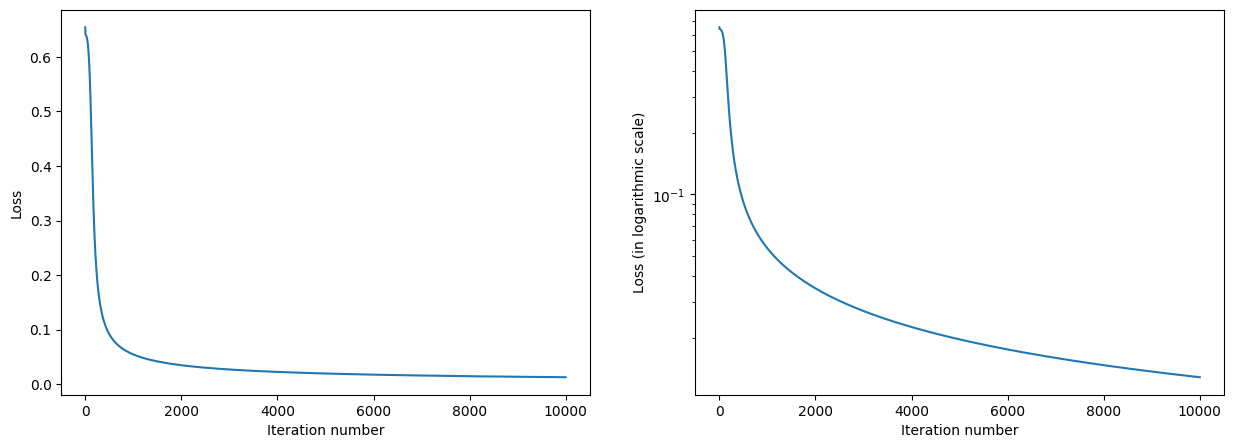

In [18]:
shallow_neural_net_act4.show_losses_over_training()

It trains, and this time, it seems to classify correctly!

That is an important lesson for us: when possible, features engineering (that is, reworking your inputs to add relevant information that could help train a model) is best! It is, however, difficult, as it requires to have insights about the dataset, which relies on human expertise/intuition.

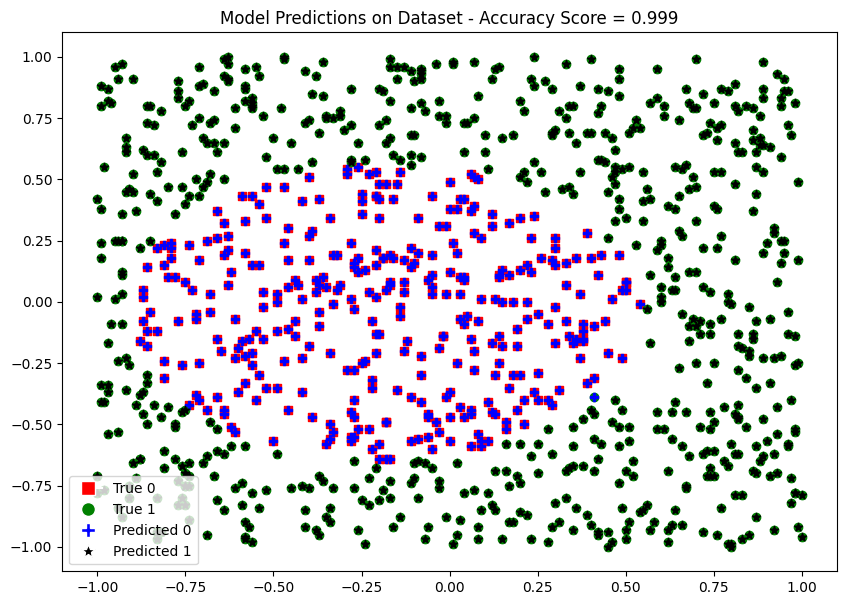

In [19]:
show_dataset_and_predictions(inputs_processing, val1_list, val2_list, outputs, shallow_neural_net_act4)

### 6. How about adding more layers?

What if we decided to stick to the original inputs (no feature processing), but added more layers, e.g. a third one?

**Practice #3: How would you modify the template below to have a third layer with the following successive sizes?**

$ N_x \rightarrow N_h \rightarrow N_{h2} \rightarrow N_y $

We already provide a suggestion for the init method, and parts where the code should probably be amended (we will probably need to amend some methods such as parameters initialization, forward and backward).

In [20]:
class ShallowNeuralNet_WithAct_ThreeLayers():
    
    def __init__(self, n_x, n_h, n_h2, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_h2 = n_h2
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_h2)*0.1
        self.b2 = np.random.randn(1, self.n_h2)*0.1
        self.W3 = np.random.randn(self.n_h2, self.n_y)*0.1
        self.b3 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        A2 = self.sigmoid(Z2_b)
        # Wx + b operation for the third layer
        Z3 = np.matmul(A2, self.W3)
        Z3_b = Z3 + self.b3
        y_pred = self.sigmoid(Z3_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # CE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        A2 = self.sigmoid(Z2_b)
        Z3 = np.matmul(A2, self.W3)
        Z3_b = Z3 + self.b3
        A3 = self.sigmoid(Z3_b)
        
        # Compute error term
        dL_dA3 = -outputs/A3 + (1 - outputs)/(1 - A3)
        dL_dZ3 = dL_dA3*A3*(1 - A3)
        dL_dA2 = np.dot(dL_dZ3, self.W3.T)
        dL_dZ2 = dL_dA2*A2*(1 - A2)
        dL_dA1 = np.dot(dL_dZ2, self.W2.T)
        dL_dZ1 = dL_dA1*A1*(1 - A1)
        
        # Gradient descent update rules
        self.W3 -= (1/m)*alpha*np.dot(A2.T, dL_dZ3)
        self.W2 -= (1/m)*alpha*np.dot(A1.T, dL_dZ2)
        self.W1 -= (1/m)*alpha*np.dot(inputs.T, dL_dZ1)
        self.b3 -= (1/m)*alpha*np.sum(dL_dZ3, axis = 0, keepdims = True)
        self.b2 -= (1/m)*alpha*np.sum(dL_dZ2, axis = 0, keepdims = True)
        self.b1 -= (1/m)*alpha*np.sum(dL_dZ1, axis = 0, keepdims = True)
        
        # Update loss
        self.CE_loss(inputs, outputs)
    
    def train(self, inputs, outputs, N_max = 1000, alpha = 1e-5, delta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            self.backward(inputs, outputs, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max*0.05) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for delta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < delta):
                if(display):
                    print("Stopping early - loss evolution was less than delta on iteration {}.".format(iteration_number))
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [21]:
# Define and train neural network structure (with activation)
n_x = 2
n_h = 2
n_h2 = 2
n_y = 1
np.random.seed(37)
shallow_neural_net_act5 = ShallowNeuralNet_WithAct_ThreeLayers(n_x, n_h, n_h2, n_y)
# Train and show final loss
shallow_neural_net_act5.train(inputs, outputs, N_max = 10000, alpha = 1, delta = 1e-8, display = True)
print(shallow_neural_net_act5.loss)

Iteration 1 - Loss = 0.6611843619878173
Stopping early - loss evolution was less than delta on iteration 19.
0.6430038220329054


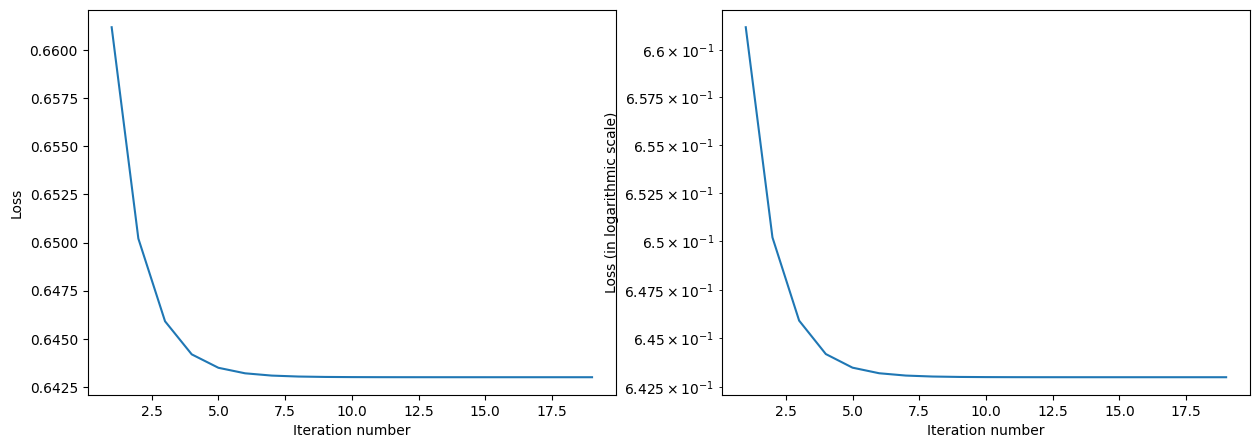

In [22]:
shallow_neural_net_act5.show_losses_over_training()

The model trains, but it still struggles to classify... (We obtain an accuracy of 66% or so)

It seems adding more layers will not do the trick here, as the problem was elsewhere: we needed more neurons in the first layer.

It was still good practice nonetheless, and a good lesson for us: adding a layer to a neural network that is malfunctioning is most likely not going to fix its issues.

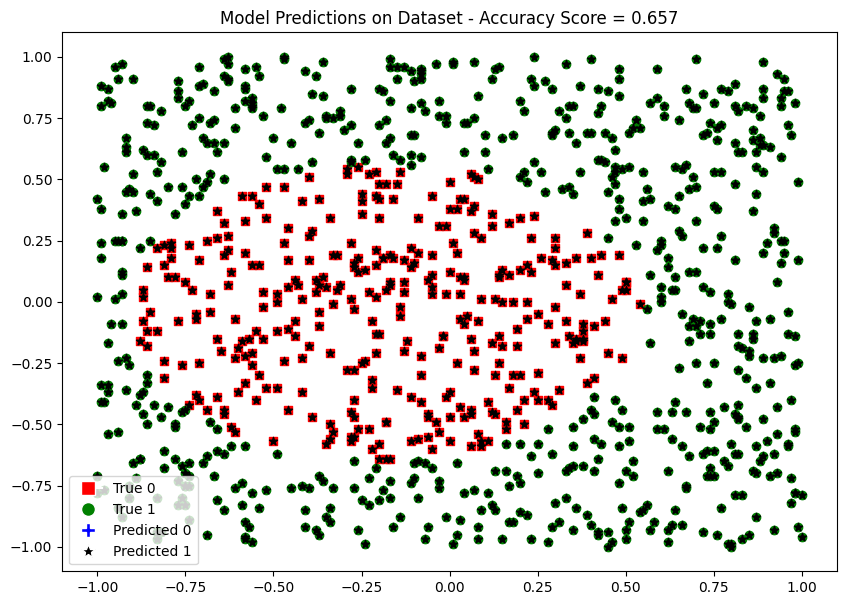

In [23]:
show_dataset_and_predictions(inputs, val1_list, val2_list, outputs, shallow_neural_net_act5)

### Typical homework questions would be

1. Show the ShallowNeuralNet_WithAct_ThreeLayers class you coded and explain the changes you made to the code.

2. Is the performance of the model improving when adding a third layer as suggested in Task 3?

3. Show the rework_inputs function you produced on Task #2 and explain your logic in terms of code.

4. Is the performance of the model improving after feature engineering? If so, how could we explain this performance improvement?

5. Task #1 suggests using two layers model with more neurons is sufficient to address our underfitting issue.
Why this be a good approach? How could we explain this intuitively?

6. Challenge: If the issue was indeed more neurons needed for our model, does that mean I could make the 1-layer model work by simply adding more neurons? Or do we need something else?

### Answers

1. As shown above.

2. It seems not. The accuracy is still low after training. It seems the problem is elsewhere, and it is not the number of layers that causes an issue. In fact, it was most likely the fact that we did not have enough neurons in our layers.

3. As above.

4. Yes, that works great. It seems that the boundary equation is an ellipse of some sort. In mathematics, ellipses have equations in the form $ ax^2 + by^2 + cxy + dx + ey + f = 0 $. This can be confirmed by looking at the utils functions that were used to generate the dataset, to recognize that the boundary indeed follows such an equation. Therefore, adding polynomial features of order 2, $ x_1^2 $ and $ x_2^2 $ for our inputs, as we did when we moved from linear to polynomial regression, seems like a brilliant idea. It will help the model correctly figure out what the boundary might be, even if the number of neurons in our layers is low! In fact, when the inputs are correclty produced for our dataset, it is possible to train a perfect model, using very few parameters/neurons!

5. More neurons in layers allows for more cross-operations between different input features, which might end up helping in our case, but in general, feature engineering (if possible) is king! Here, the issue was that we did not have enough neurons in the first layer. Adding more layers is not going to resolve this issue, and that is an important lesson for us: Adding an extra layer to a model in the hopes that it will fix the issues of our model is often foolish...

6. Technically, if there is only one layer in the neural network, the size of this layer is decided by $ n_x $ and $ n_y $, which are fixed by the dataset. There are technically no choices for me in terms of choosing the number of neurons! You can check the class for the single layer NN, and you will realize that I cannot choose a value $ n_h $ for any of my layers!
Now, a much more interesting question would be... Can I make it work with a single layer neural network, if I were to use the feature engineering trick from earlier? Or do I really need two layers + feature engineering? To be solved by you! :)